# Sales (Advertising - Sales) Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Assignment 1 SALES.csv", header=None, sep="\s+")
df.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


## Column Renaming

In [3]:
df.columns = ['Advertising', 'Sales']
df.head()

,Advertising,Sales
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


## Exploratory Data Analysis

In [4]:
df.shape

(36, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Advertising  36 non-null     float64
 1   Sales        36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [6]:
df.describe(include='all')

,Advertising,Sales
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


## Dividing the dataset into feature and target variables

In [7]:
x = df.Advertising.values
y = df.Sales.values

In [8]:
x

array([12. , 20.5, 21. , 15.5, 15.3, 23.5, 24.5, 21.3, 23.5, 28. , 24. ,
       15.5, 17.3, 25.3, 25. , 36.5, 36.5, 29.6, 30.5, 28. , 26. , 21.5,
       19.7, 19. , 16. , 20.7, 26.5, 30.6, 32.3, 29.5, 28.3, 31.3, 32.3,
       26.4, 23.4, 16.4])

In [9]:
y

array([15., 16., 18., 27., 21., 49., 21., 22., 28., 36., 40.,  3., 21.,
       29., 62., 65., 46., 44., 33., 62., 22., 12., 24.,  3.,  5., 14.,
       36., 40., 49.,  7., 52., 65., 17.,  5., 17.,  1.])

## Visual Exploratory Data Analysis

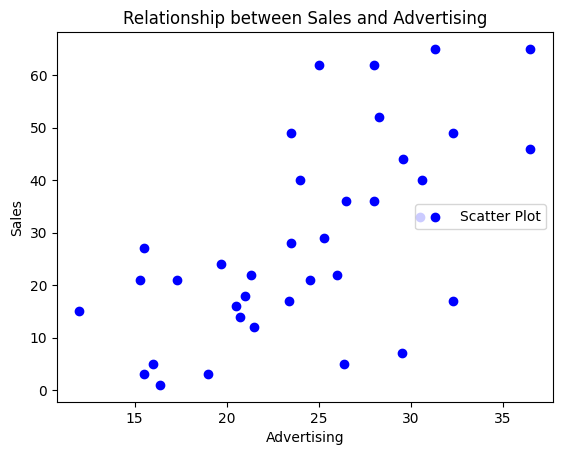

In [10]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.legend(loc=5)
plt.show()

## Checking dimensions of X and Y

In [11]:
print(x.shape)
print(y.shape)

(36,)
(36,)


## Reshaping X and Y to train the model

Otherwise model will throw an error

In [12]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(36, 1)
(36, 1)


## Split X and Y into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Printing the dimensions of X_train,X_test,y_train,y_test
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((28, 1), (8, 1), (28, 1), (8, 1))

## Model Implementation

In [14]:
# Createing instance of Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

# Predicting on test data
Y_pred = lm.predict(X_test)

## Model slope and intercept term

In [15]:
# Slope And Intercept

print("Estmated model slope:", lm.coef_)
print("Estmated model intercept:", lm.intercept_)

Estmated model slope: [[1.66205855]]
Estmated model intercept: [-12.45519409]


In [16]:
# Single Prediction

lm.predict([[25]])

array([[29.09626967]])

## Evaluation (Metrics)

#### Root Mean Square Error

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 12.8198


#### R2 Score

In [18]:
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 score value: 0.5875


## Ploting the Regression Line

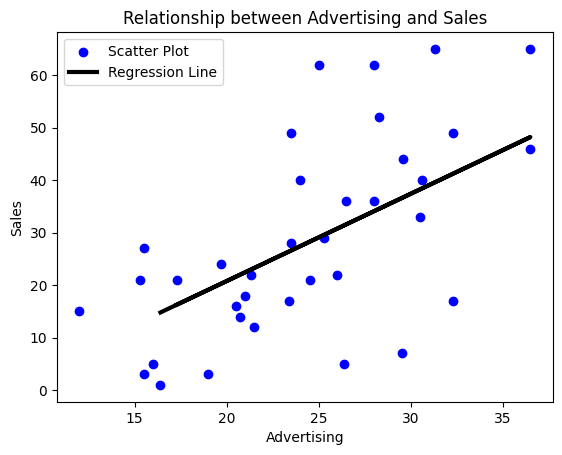

In [19]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.plot(X_test, Y_pred, color='black', linewidth=3, label= 'Regression Line')
plt.title('Relationship between Advertising and Sales')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.legend() 
plt.show()